In [1]:
import json
import pandas as pd
import numpy as np

import pymongo
from pymongo import MongoClient

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_validate
from sklearn.metrics import r2_score

import matplotlib.pyplot as plt
plt.style.use("ggplot")
%matplotlib inline

In [2]:
# Load in our parameters file
with open('../parameters.json') as f:
    params = json.load(f)

In [3]:
database = params['database']
duration_collection = params['duration_collection']

# Connect to our database/collection
client = MongoClient('localhost', 27017)
db = client[database]
duration_coll = db[duration_collection]

In [4]:
time_df = pd.DataFrame(list(duration_coll.find({},{'_id':0})))
trimed_df = time_df[time_df['duration'] < 4500]
trimed_df.head()

,duration,min_noon_sqr,min_since_midnight,start_timestamp,trip_id_iso
0,2341.0,481636,26,1.475912e+09,7253717_2016-10-08_4489K
1,2940.0,12321,609,1.475947e+09,7253845_2016-10-08_GHNYG
2,3450.0,729,747,1.475955e+09,7253837_2016-10-08_8Q6DP
3,3268.0,28900,890,1.475963e+09,7253830_2016-10-08_SR1KP
4,3274.0,96100,1030,1.475972e+09,7253823_2016-10-08_TDW9M


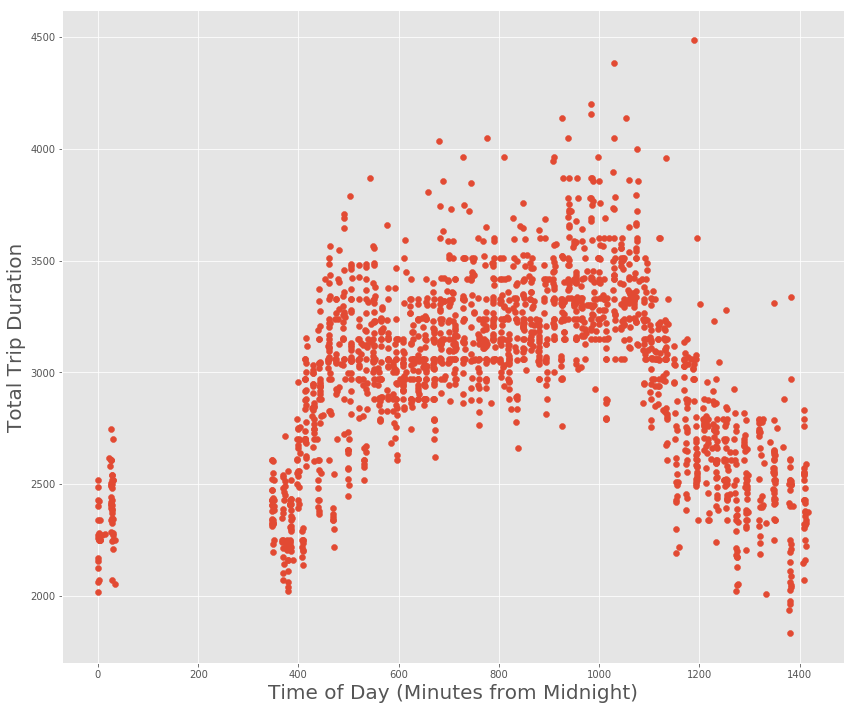

In [19]:
trimed_df = time_df[time_df['duration'] < 4500]

y = trimed_df['duration'].values.reshape(-1,1)

x = trimed_df['min_since_midnight'].values.reshape(-1,1)
fig, ax = plt.subplots(figsize=(14, 12))
ax.scatter(x, y)
ax.set_xlabel("Time of Day (Minutes from Midnight)", fontsize=20)
ax.set_ylabel("Total Trip Duration", fontsize=20);
plt.savefig('total_vs_mfm.png')

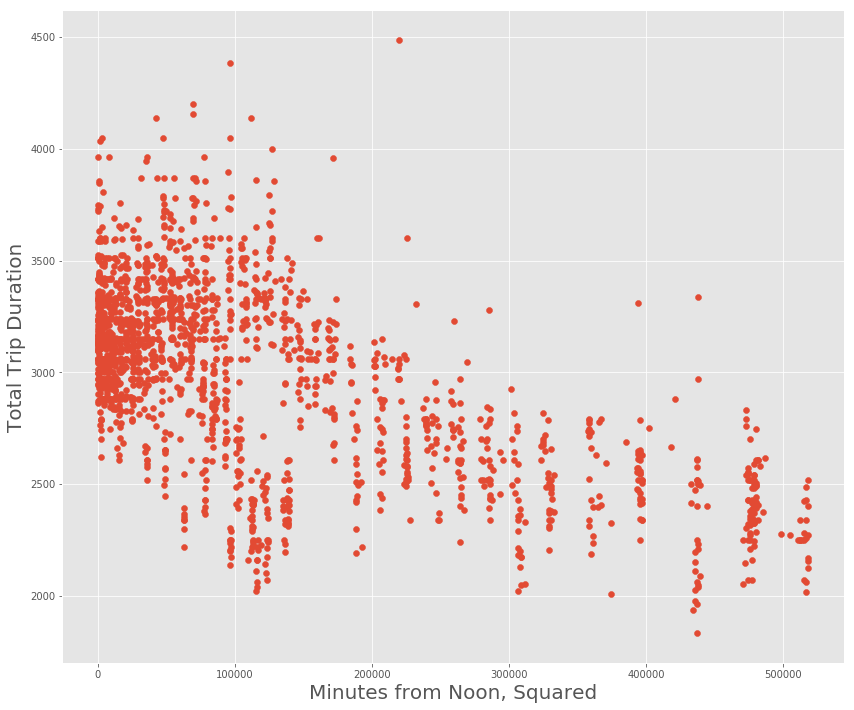

In [22]:
y = trimed_df['duration'].values.reshape(-1,1)
x = trimed_df['min_noon_sqr'].values.reshape(-1,1)

fig, ax = plt.subplots(figsize=(14, 12))
ax.scatter(x, y)
ax.set_xlabel("Minutes from Noon, Squared", fontsize=20)
ax.set_ylabel("Total Trip Duration", fontsize=20);
plt.savefig('total_vs_mfn_sq.png')